# construct `PROVABGS` sample from SV3 data

In [4]:
import os
import numpy as np 
from astropy.table import Table
# --- plotting --- 
import corner as DFM
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

Read LSS clustering catalog

In [10]:
dat_dir = '/Users/chahah/data/boss-sbi/'
bgs = Table.read(os.path.join(dat_dir, 'sv3.20210420.BGS_ANYALLtiles_full.fits'))
print('%i BGS objects' % len(bgs))

195861 BGS objects


Only keep good redshifts

In [11]:
is_goodz = ((bgs['Z'] != 1e20) & (bgs['ZWARN'] == 0) & (bgs['DELTACHI2'] > 40))
print('%i good redshifts' % np.sum(is_goodz))

146423 good redshifts


Only keep $0.01 < z < 0.6$

In [17]:
is_zlim = (bgs['Z'] > 0.01) & (bgs['Z'] < 0.6)
print('%i within z limit' % np.sum(is_goodz & is_zlim))

144805 within z limit


In [18]:
cuts = is_goodz & is_zlim

Text(0, 0.5, '${\\rm d}N/{\\rm d}z$')

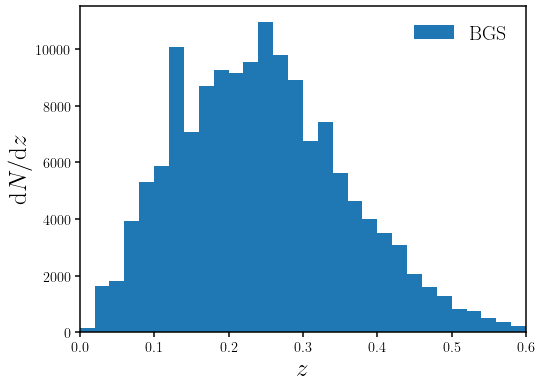

In [19]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_ = sub.hist(bgs['Z'][cuts], range=(0., 0.6), bins=30, label='BGS')
sub.legend(loc='upper right', fontsize=20)
sub.set_xlabel('$z$', fontsize=25)
sub.set_xlim(0., 0.6)
sub.set_ylabel(r'${\rm d}N/{\rm d}z$', fontsize=25)

In [20]:
g_mag = 22.5 - 2.5 * np.log10(bgs['FLUX_G'][cuts])
r_mag = 22.5 - 2.5 * np.log10(bgs['FLUX_R'][cuts]) 
z_mag = 22.5 - 2.5 * np.log10(bgs['FLUX_Z'][cuts])

(-1.0, 3.0)

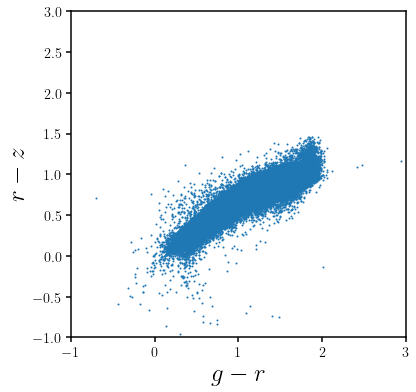

In [21]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(g_mag - r_mag, r_mag - z_mag, s=1)
sub.set_xlabel('$g-r$', fontsize=25)
sub.set_xlim(-1., 3)
sub.set_ylabel('$r-z$', fontsize=25)
sub.set_ylim(-1., 3)

In [22]:
provabgs = bgs[cuts]

In [24]:
provabgs.write(os.path.join('/Users/chahah/data/provabgs/provabgs.sv3.empty.fits'))

In [38]:
len(provabgs)

144805

In [39]:
144805 * 10000

1448050000